## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('loan_prediction.csv')

In [3]:
# Top 5 rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Dimensions of dataset
data.shape

(614, 13)

There are 614 rows and 13 columns.

NOTE: loan_status is our target variable

## Exploratory Data Analysis (EDA)

In [5]:
# Datatypes of data
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 object datatypes columns, 1 integer and rest is float datatype.

In [6]:
# information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we can see complete information of all the Non-Null count, Dtype

In [7]:
# Columns name
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Statistical information
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


(1). The mean is more than median for ApplicantIncome, CoapplicantIncome and LoanAmount.

(2). The large difference between standard deviation and maximum ApplicantIncome and CoapplicantIncome

In [9]:
# keeping the object datatype columns in a variable.
a = data.describe(include=['O']).columns

In [10]:
for i in a:
    print(i)
    print(data[i].value_counts())
    print('\n')

Loan_ID
LP002940    1
LP001641    1
LP002618    1
LP002337    1
LP001603    1
           ..
LP002473    1
LP002151    1
LP002004    1
LP001508    1
LP001478    1
Name: Loan_ID, Length: 614, dtype: int64


Gender
Male      489
Female    112
Name: Gender, dtype: int64


Married
Yes    398
No     213
Name: Married, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




In [11]:
# checking the missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are several null values present in several columns, we need to impute these values.

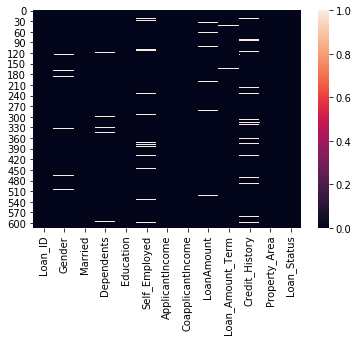

In [12]:
sns.heatmap(data.isnull())

## Treating Null Values

In [13]:
data['Gender'].mode()

0    Male
dtype: object

In [14]:
data['Gender'].fillna('Male', inplace=True)

In [15]:
data['Married'].mode()

0    Yes
dtype: object

In [16]:
data['Married'].fillna('Yes', inplace=True)

In [17]:
data['Dependents'].mode()

0    0
dtype: object

In [18]:
data['Dependents'].fillna('0', inplace=True)

In [19]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [20]:
data['Dependents']=data['Dependents'].replace('3+', '3')

In [21]:
data['Dependents']=data['Dependents'].astype('int')

In [22]:
data['Dependents'].unique()

array([0, 1, 2, 3])

In [23]:
data['Self_Employed'].mode()

0    No
dtype: object

In [24]:
data['Self_Employed'].fillna('No', inplace=True)

In [25]:
data['LoanAmount'].mean()

146.41216216216216

In [26]:
data['LoanAmount'].median()

128.0

In [27]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [28]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [29]:
data['Loan_Amount_Term'].median()

360.0

In [30]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [31]:
data['Credit_History'].mode()

0    1.0
dtype: float64

In [32]:
data['Credit_History'].median()

1.0

In [33]:
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

In [34]:
# Checking the missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null values has been removed

## Data Visualization

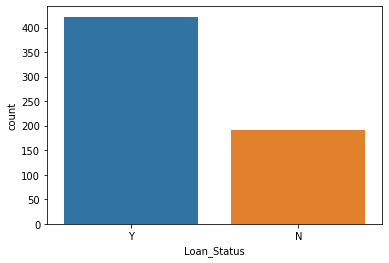

In [35]:
sns.countplot(data['Loan_Status'])

This is target variable, it tiiks imbalanced.

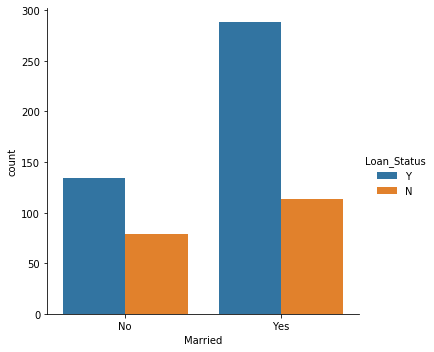

In [36]:
sns.catplot(x='Married', hue='Loan_Status', kind='count', data=data)

chances of loan approval are more for married persons.

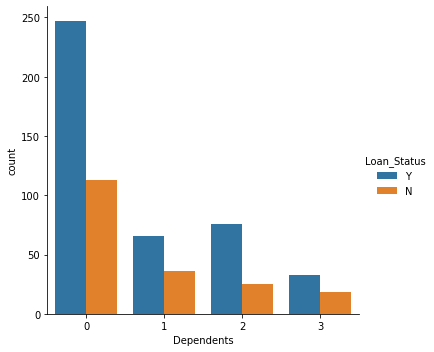

In [37]:
sns.catplot(x='Dependents', hue='Loan_Status', kind='count', data=data)

0 dependents having more chances of loan approval.

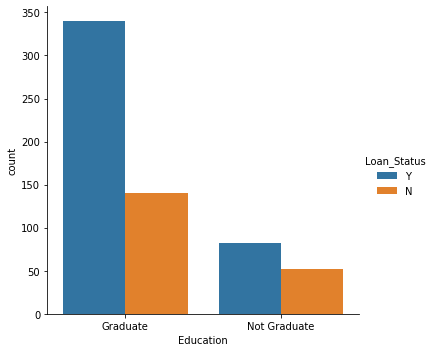

In [38]:
sns.catplot(x='Education', hue='Loan_Status', kind='count', data=data)

Graduates have more approved loan status.

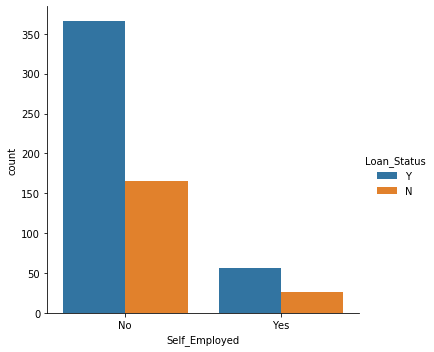

In [39]:
sns.catplot(x='Self_Employed', hue='Loan_Status', kind='count', data=data)

people who not self employed have high rate of loan approval.

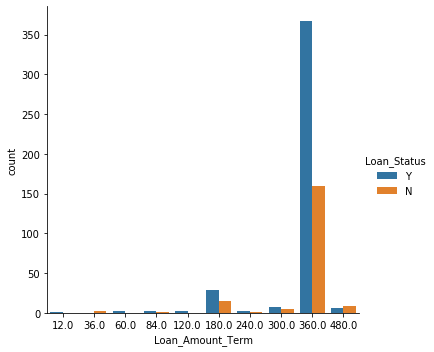

In [40]:
sns.catplot(x='Loan_Amount_Term', hue='Loan_Status', kind='count', data=data)

loan amount term with 360 have more chance of loan approval.

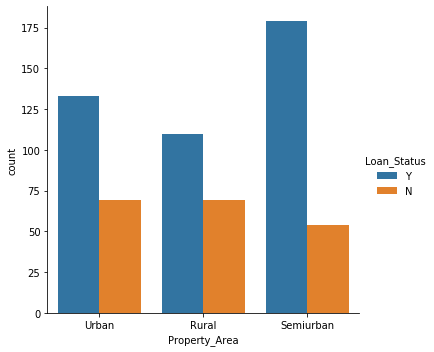

In [41]:
sns.catplot(x='Property_Area', hue='Loan_Status', kind='count', data=data)

semi urban property area has high rate of loan approval.

In [42]:
# Droping the unwanted column
data.drop('Loan_ID', axis=1, inplace=True)

In [43]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [44]:
# Keeping the object datatype columns in a variable.
a = data.describe(include=['O']).columns

saving the object datatype column in a variable

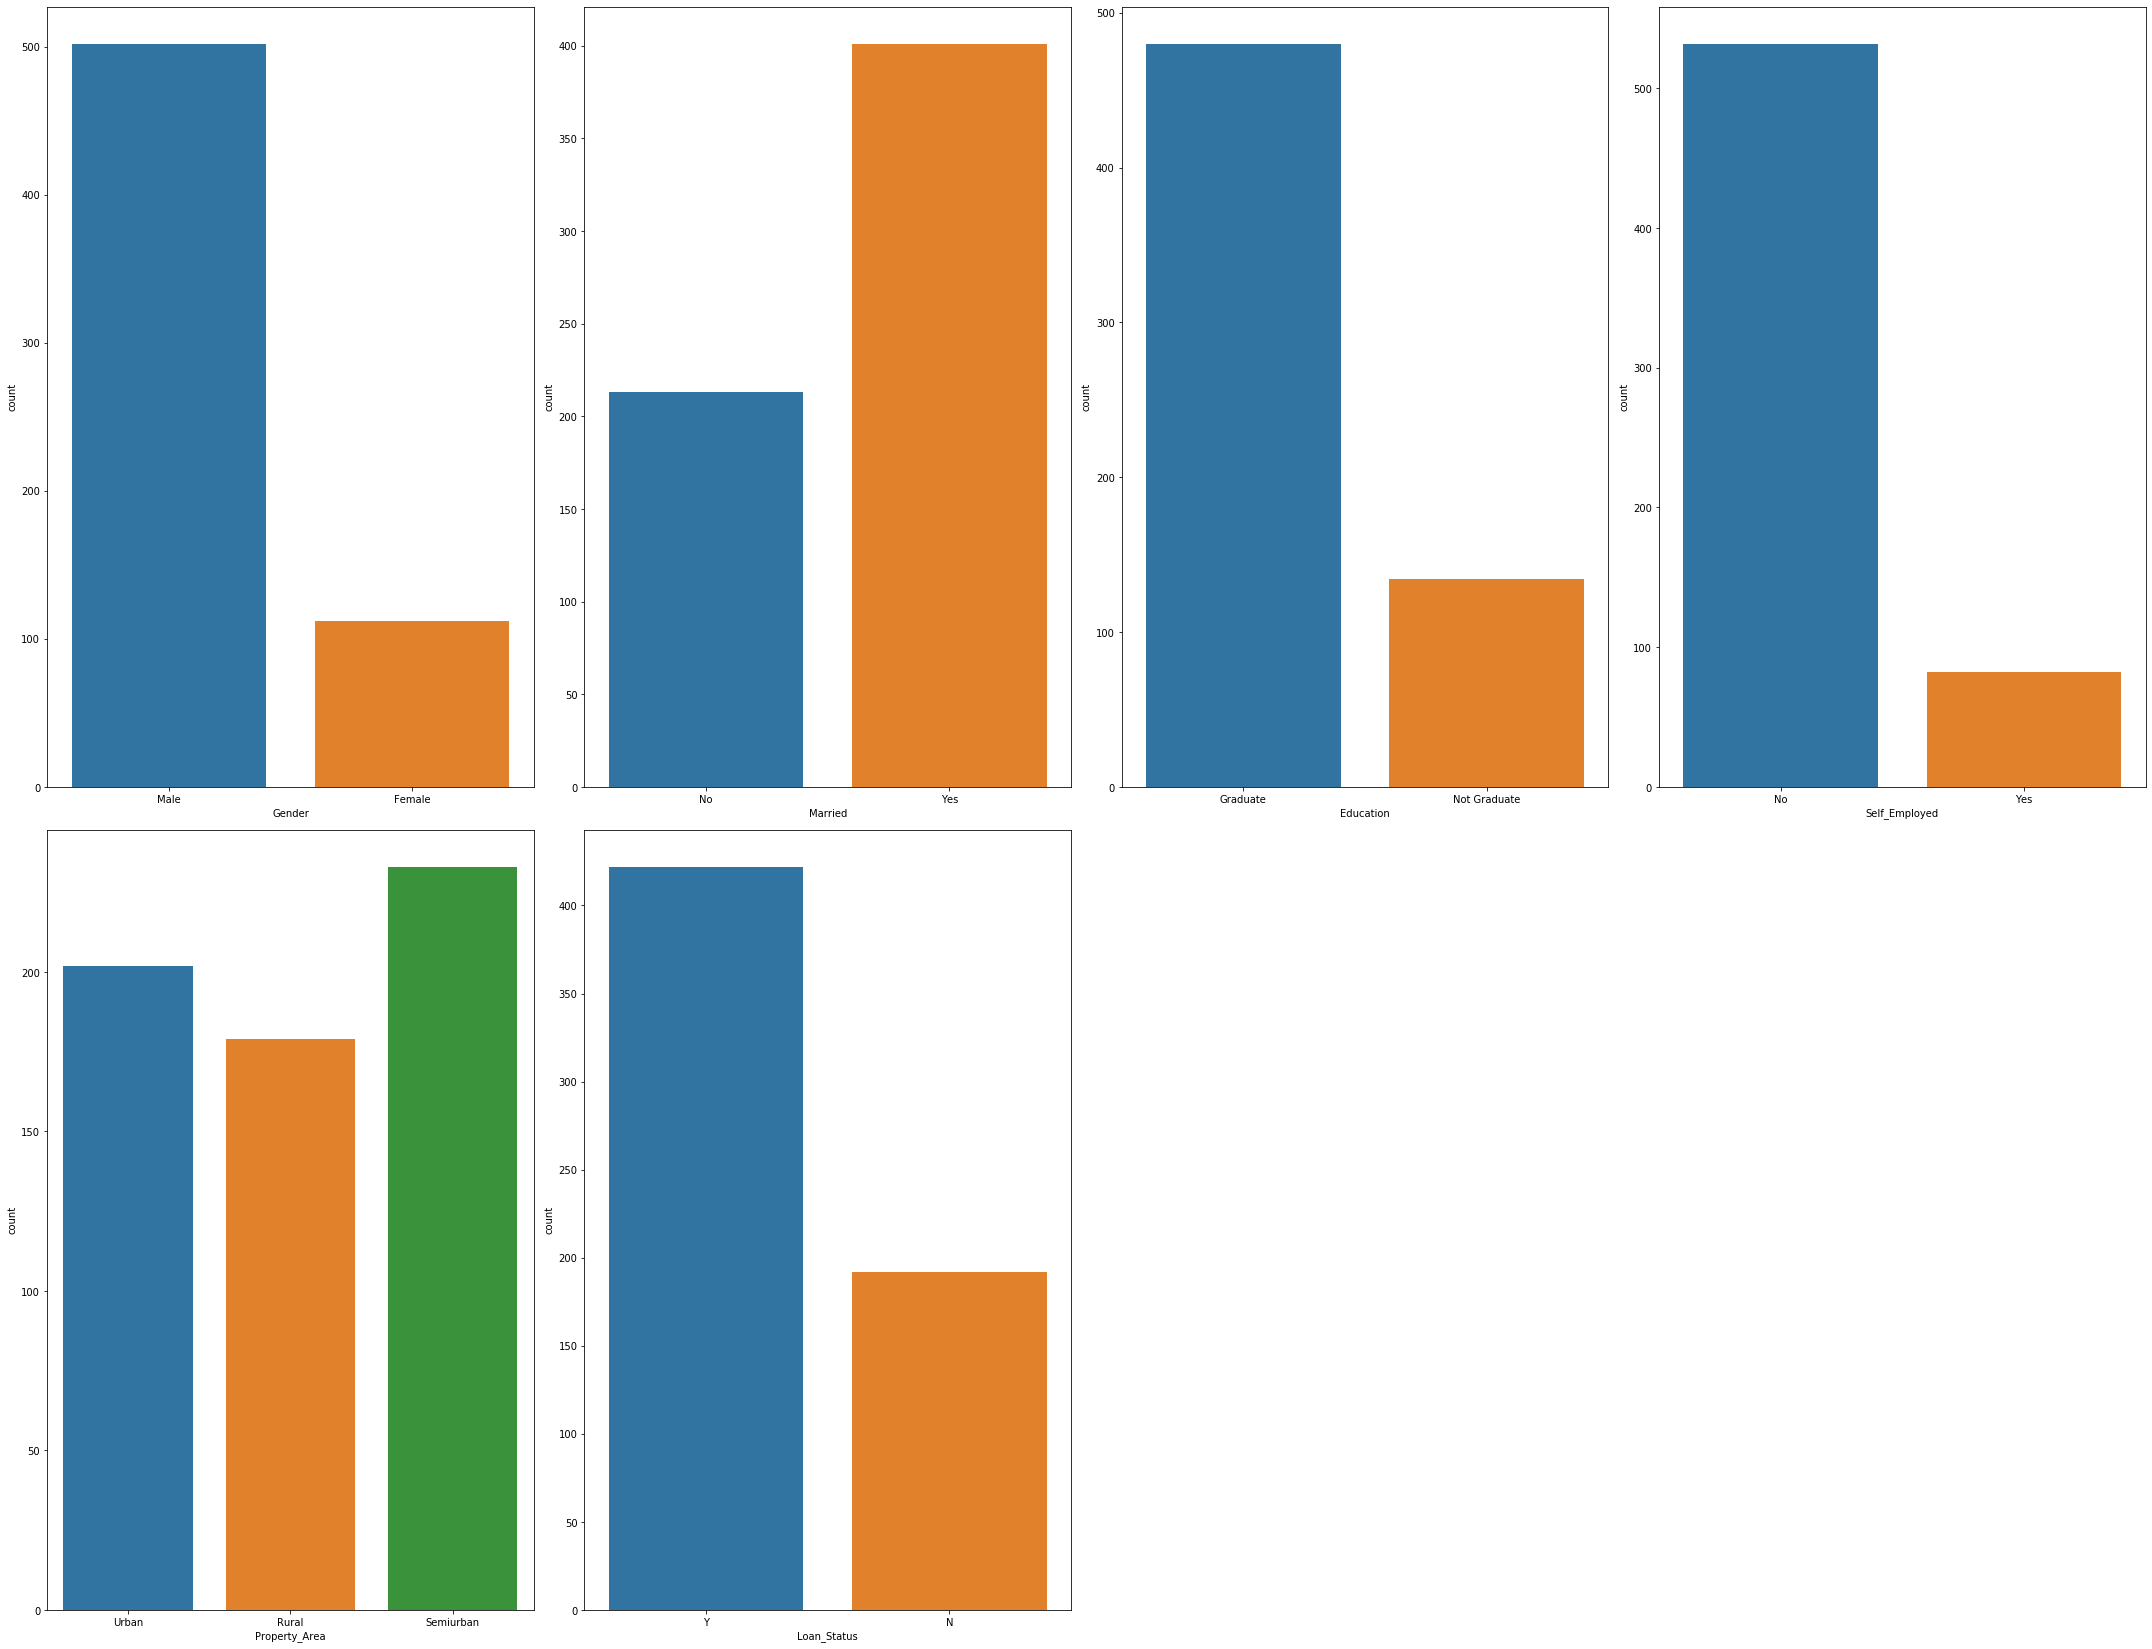

In [45]:
plt.figure(figsize=(30,34))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    sns.countplot(data[a[i]])
    plt.tight_layout()

Observations:
    
(1). Male gender count is more than Female.

(2). Married category is more than Single.

(3). Maximum people are educated.

(4). Maximum people are not self employed.

(5).Maximum people are from semi urban area.

(6). Loan status are approved maximum.

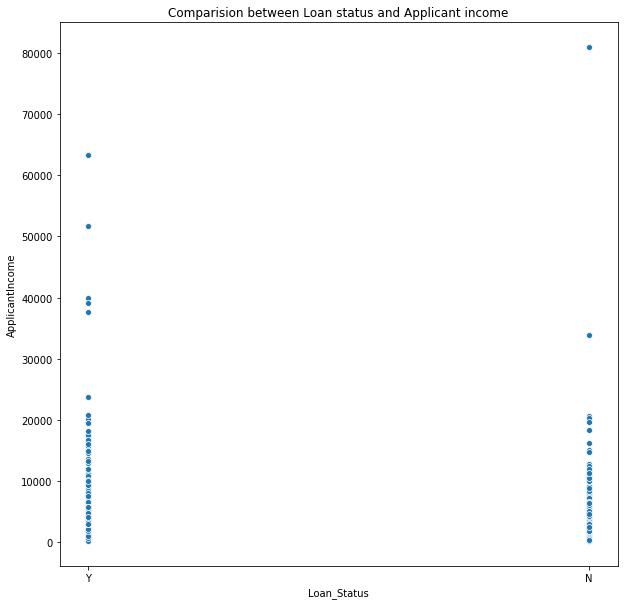

In [46]:
plt.figure(figsize=[10, 10])
plt.title("Comparision between Loan status and Applicant income")
sns.scatterplot(data['Loan_Status'], data['ApplicantIncome'])

applicant income having more chances of approval

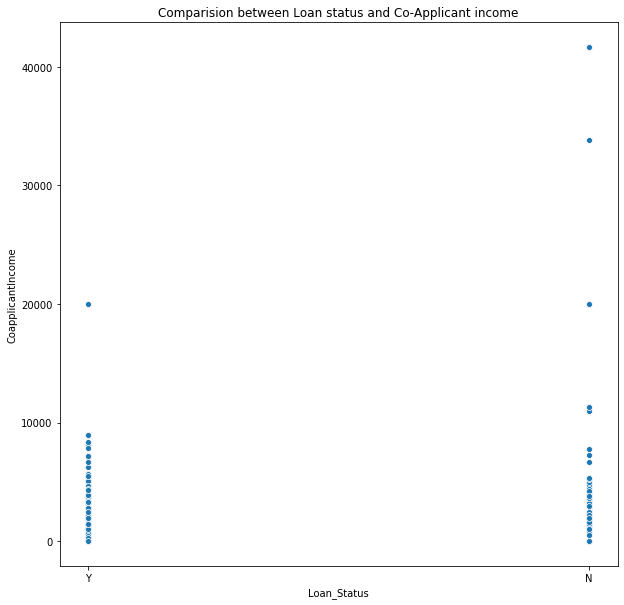

In [47]:
plt.figure(figsize=[10, 10])
plt.title("Comparision between Loan status and Co-Applicant income")
sns.scatterplot(data['Loan_Status'], data['CoapplicantIncome'])

Co-applicant Income are not approval more

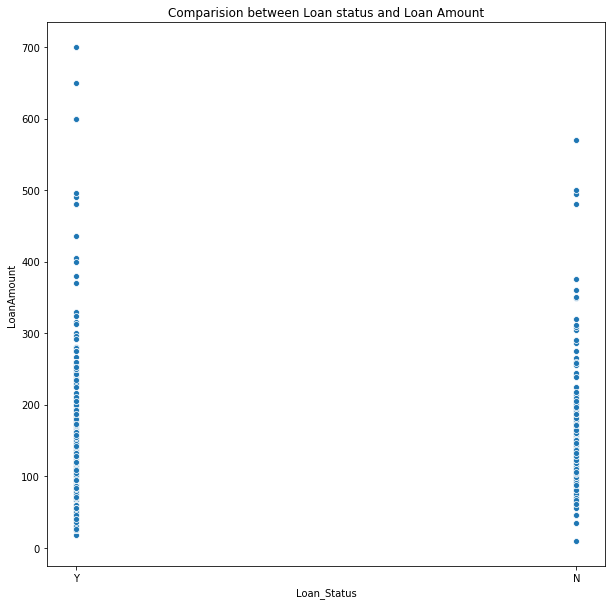

In [48]:
plt.figure(figsize=[10, 10])
plt.title("Comparision between Loan status and Loan Amount")
sns.scatterplot(data['Loan_Status'], data['LoanAmount'])

Higher loan amount has approved but depends on other factors.

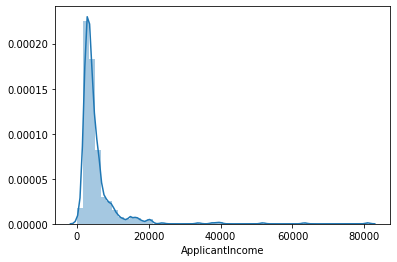

In [49]:
sns.distplot(data['ApplicantIncome'])

Loan applicant with income between 0 to 6000 are present in maximum number in the data set.

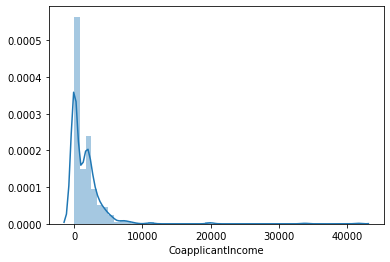

In [50]:
sns.distplot(data['CoapplicantIncome'])

Loan applicant with CoapplicantIncome between 0 to 4000 are present in maximum number in the data set.

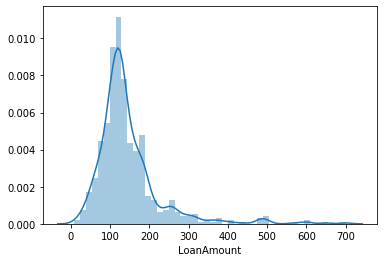

In [51]:
sns.distplot(data['LoanAmount'])

Loan applicant with Loan Amount between 100 to 200 are present in maximum number in the data set.

## Label Encoding

In [52]:
df_le=[]
for i in data.columns:
    if data[i].dtypes=="object":
        df_le.append(i)

In [53]:
df_le

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [54]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for value in df_le:
    data[value] = LE.fit_transform(data[value])
    print(data[value].value_counts())

1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [56]:
corr = data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


## Multivariate Analysis

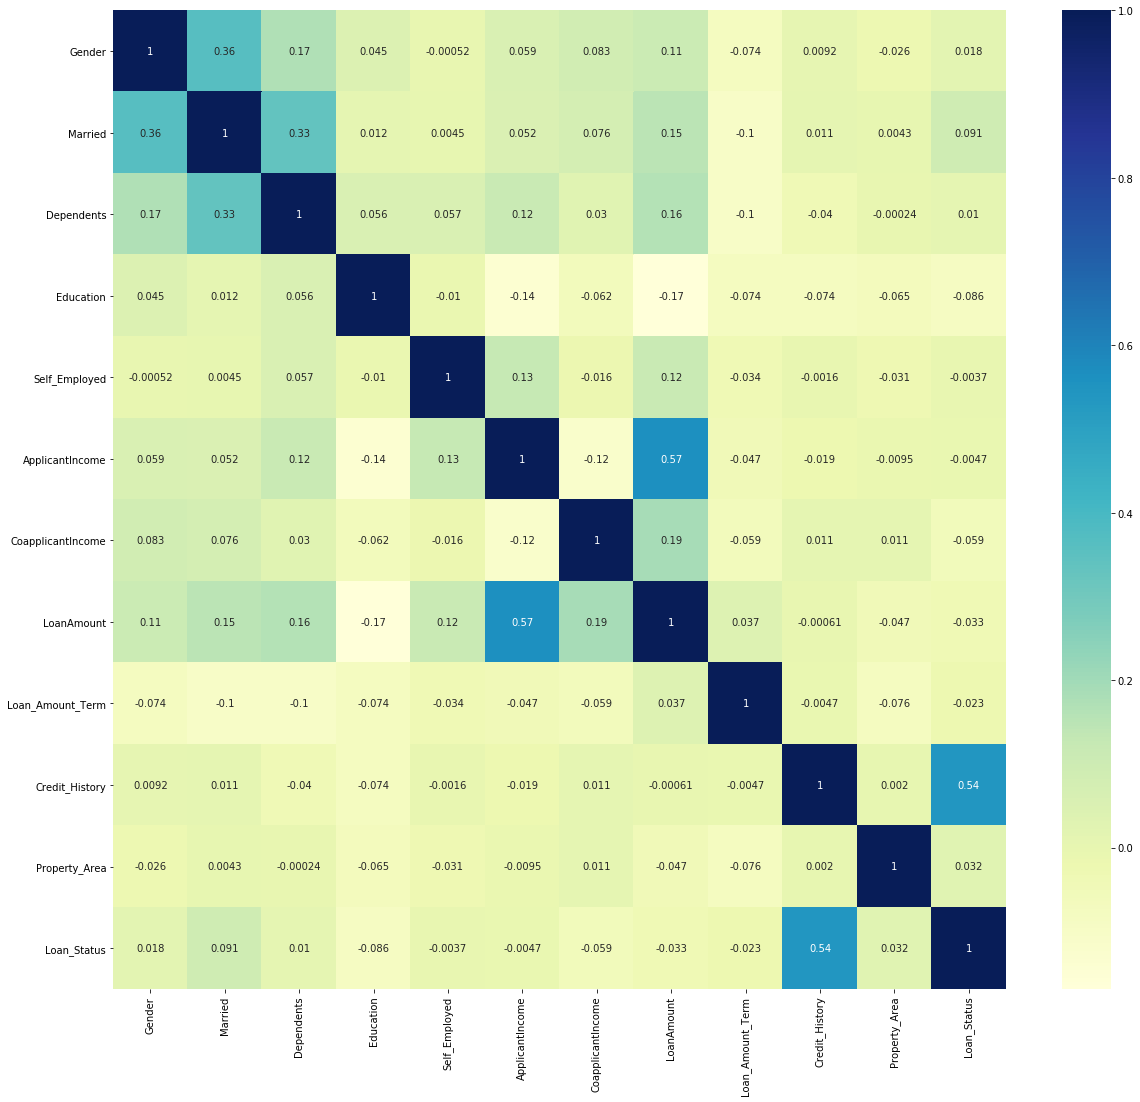

In [57]:
plt.figure(figsize=(20, 18))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

Observations:
    
(1). Loan Status is highly positively correlated to the credit histor of applicants.

(2). Credit history of applicants  is highly negatively correlated to the education of applicants.

(3). Education of applicants  is highly positively correlated to the number of dependents.

(4). Education of applicants  is highly negatively correlated to the Status of loan.

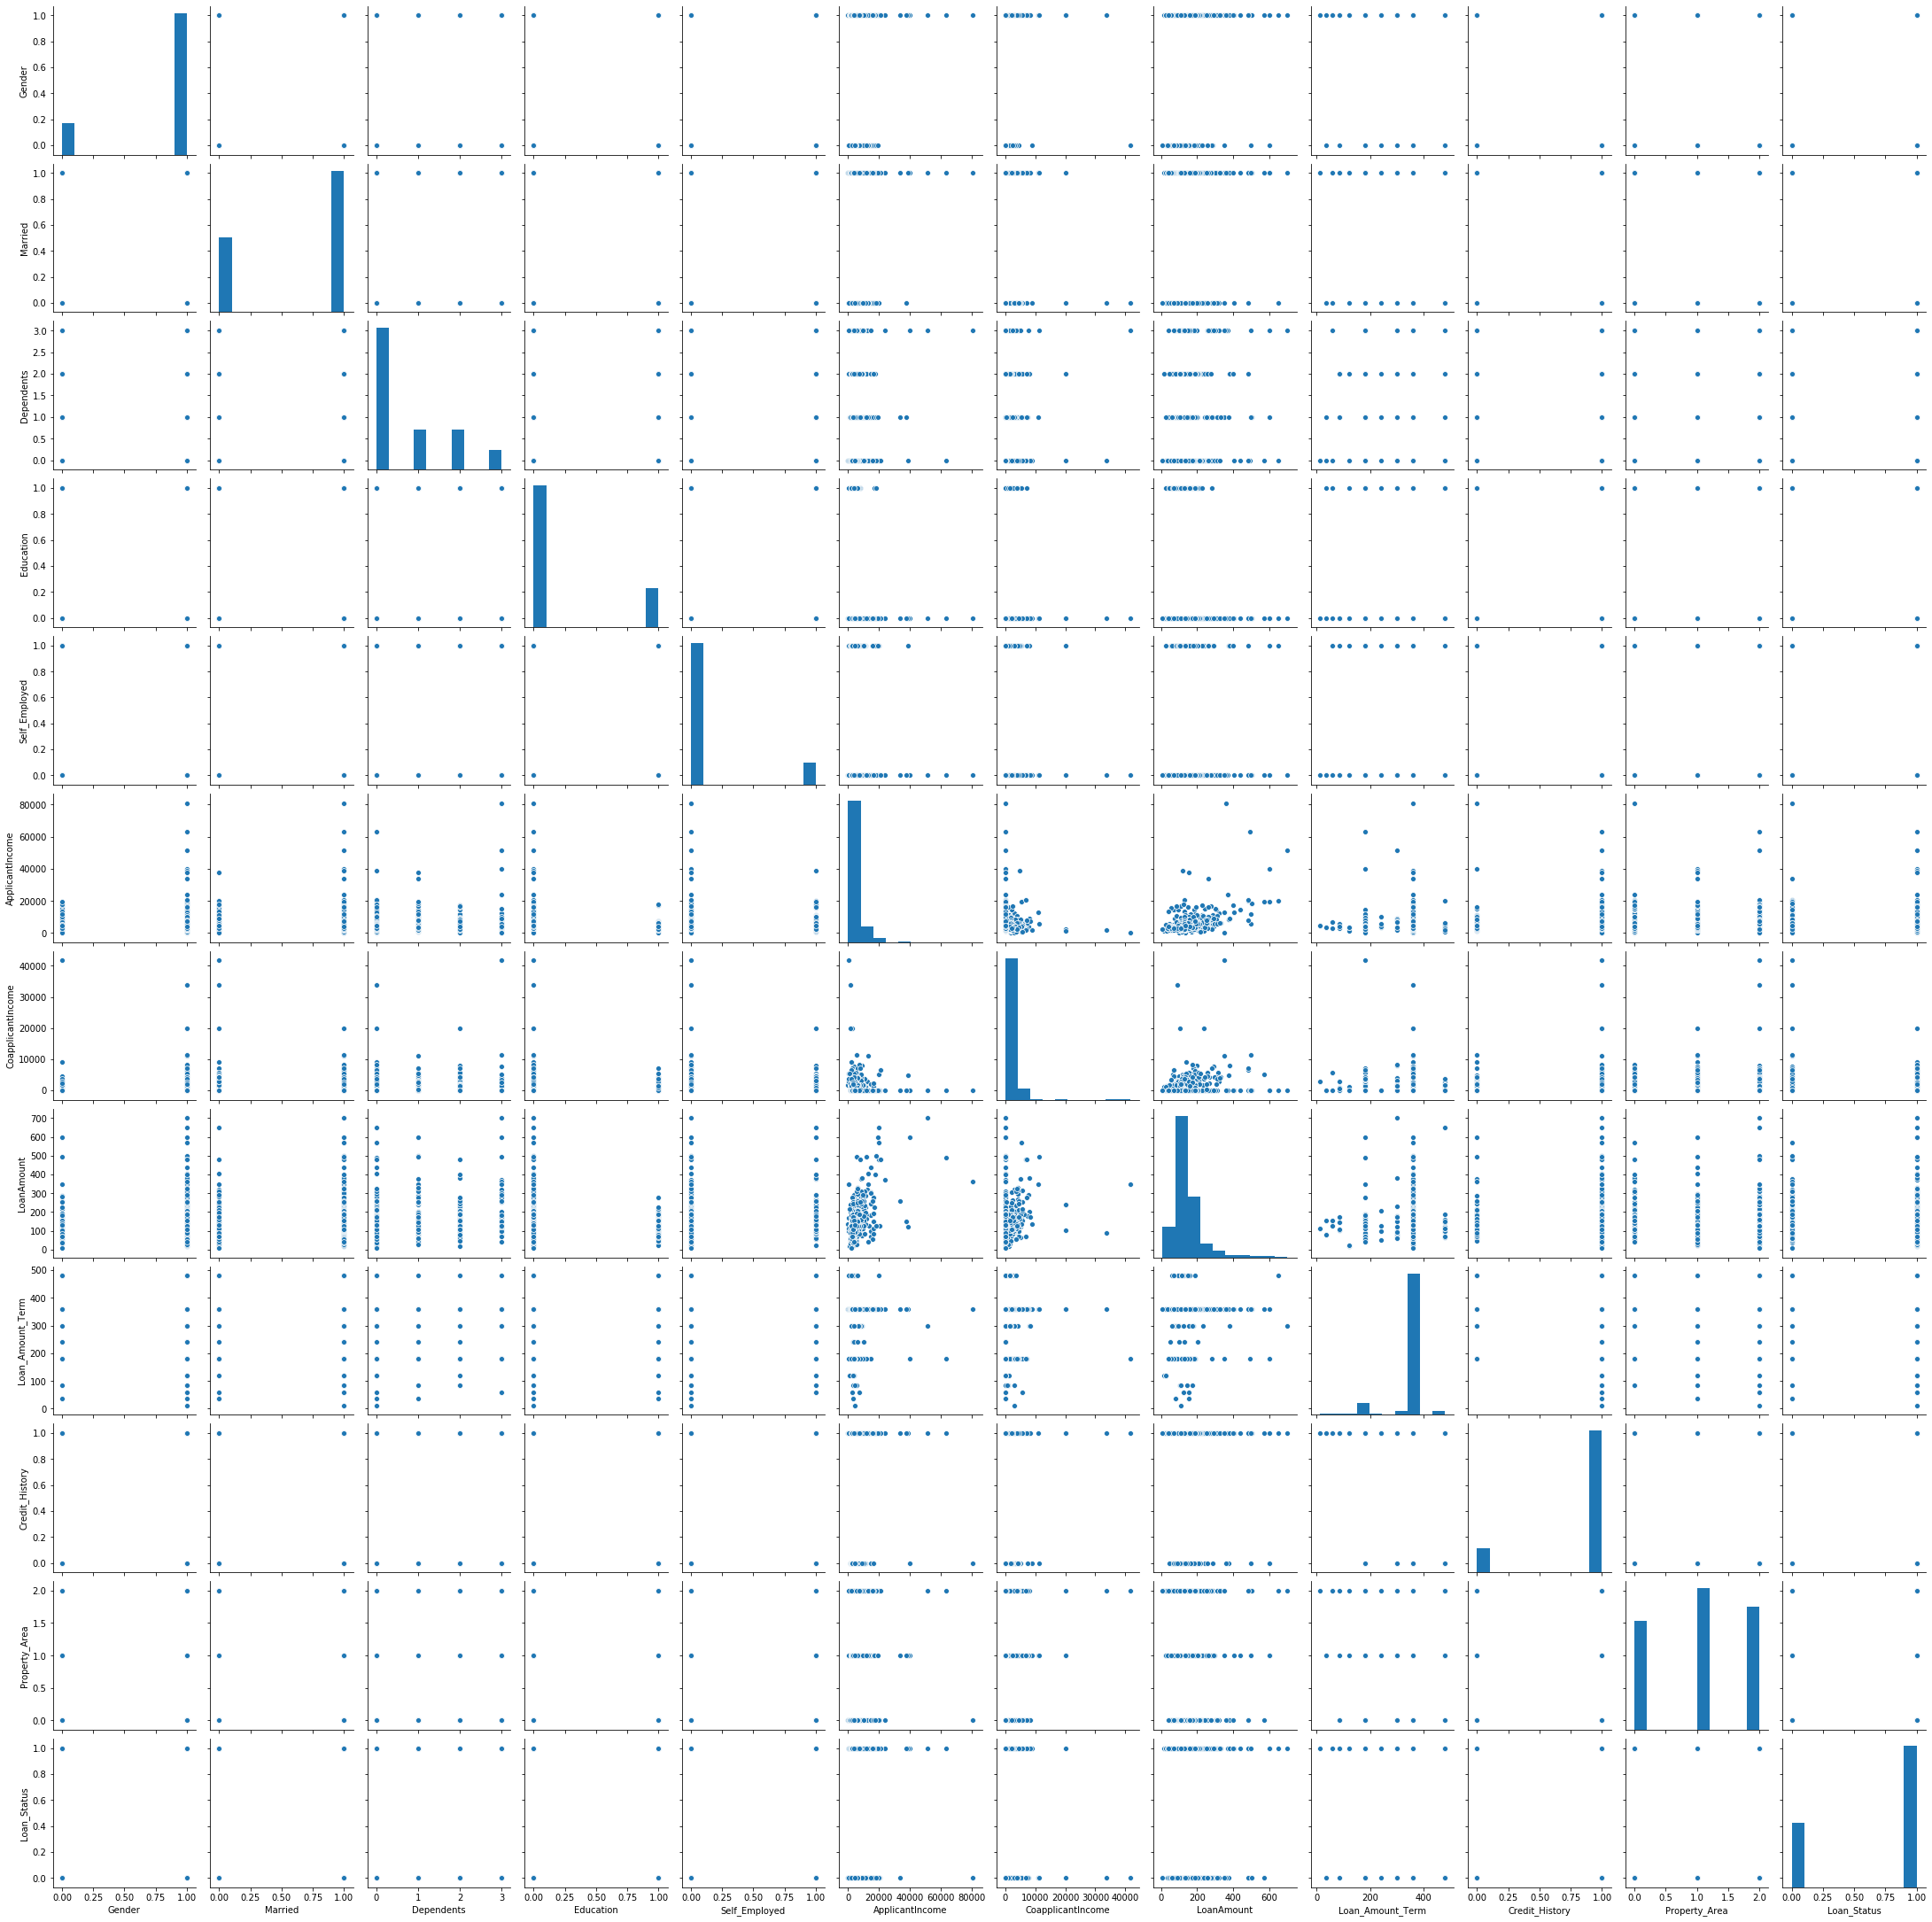

In [58]:
sns.pairplot(data)

Observations:
    
(1). People with more income takes loan of more amount.

(2). Loan amount term with 360 is more.

## Checking Outliers

Gender                  AxesSubplot(0.125,0.125;0.0545775x0.755)
Married              AxesSubplot(0.190493,0.125;0.0545775x0.755)
Dependents           AxesSubplot(0.255986,0.125;0.0545775x0.755)
Education            AxesSubplot(0.321479,0.125;0.0545775x0.755)
Self_Employed        AxesSubplot(0.386972,0.125;0.0545775x0.755)
ApplicantIncome      AxesSubplot(0.452465,0.125;0.0545775x0.755)
CoapplicantIncome    AxesSubplot(0.517958,0.125;0.0545775x0.755)
LoanAmount           AxesSubplot(0.583451,0.125;0.0545775x0.755)
Loan_Amount_Term     AxesSubplot(0.648944,0.125;0.0545775x0.755)
Credit_History       AxesSubplot(0.714437,0.125;0.0545775x0.755)
Property_Area         AxesSubplot(0.77993,0.125;0.0545775x0.755)
Loan_Status          AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

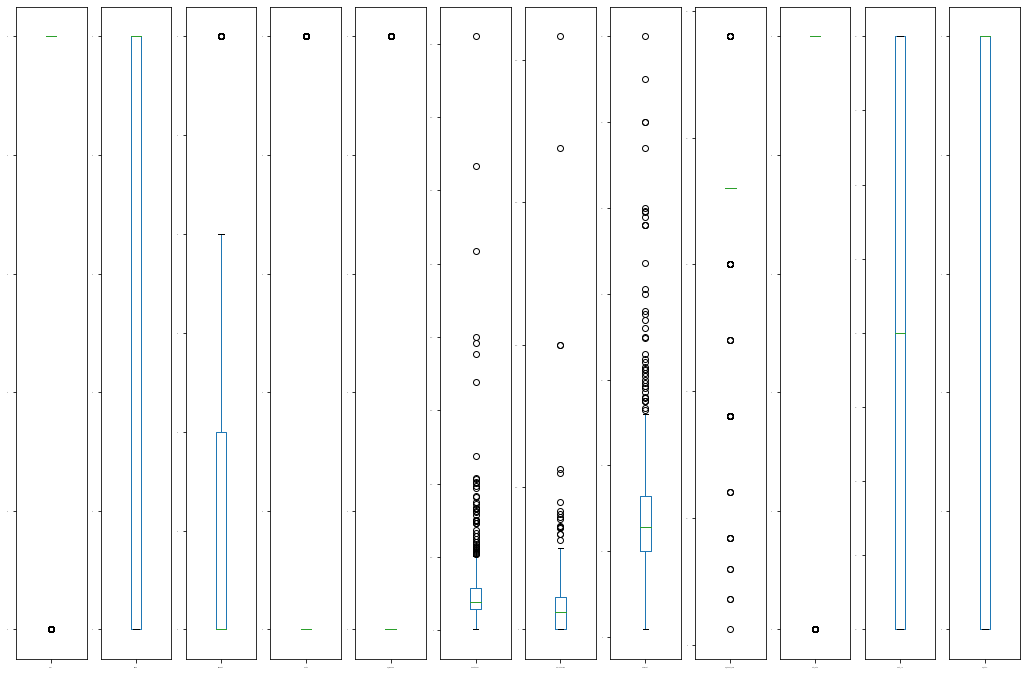

In [59]:
data.plot(kind='box', subplots=True, layout=(1,12), sharex=False, fontsize=1, figsize=(18, 12))

Observation:
    
Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term,  Credit_History have Outliers.

## Removing Outliers

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [61]:
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [62]:
df = data[(z<3).all(axis=1)]

In [63]:
print(data.shape)
print(df.shape)

(614, 12)
(577, 12)


In [64]:
# Data Loss
Data_loss = ((614-577)/614)*100
Data_loss

6.026058631921824

After removing the outliers the data loss is less than 7%.

In [65]:
# Splitting x and y variables.
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
print(x.shape)
print(y.shape)

(577, 11)
(577,)


In [66]:
# Checking skewness
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

skewness present in ApplicantIncome, CoapplicantIncome and LoanAmount column.

In [67]:
x['ApplicantIncome'] = np.log1p(x['ApplicantIncome'])

In [68]:
x['CoapplicantIncome'] = np.log1p(x['CoapplicantIncome'])

In [69]:
x['LoanAmount'] = np.sqrt(x['LoanAmount'])

In [70]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Removed the skewness

## Scaling the data

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.23085296,
        -2.38941464, -0.03952504]])

## Trainig and testing of model

In [72]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [74]:
# Creating train test split using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

In [75]:
# Importing various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Initializing the instance of the model
Lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [77]:
models = []
models.append(('LogisticRegression',Lr))
models.append(('GaussianNB',gnb))
models.append(('SupportVectorClassifier',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [78]:
#Importing required modules
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

---------------------------- LogisticRegression ------------------------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy_score:  0.8275862068965517


cross_val_score:  0.8163418290854573


roc_auc_score:  0.6876660341555978


Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.82      0.99      0.89        85

    accuracy                           0.83       116
   macro avg       0.87      0.69      0.72       116
weighted avg       0.84      0.83      0.80       116

Confusion matrix: 

[[12 19]
 [ 1 84]]


AUC_ROC Curve:



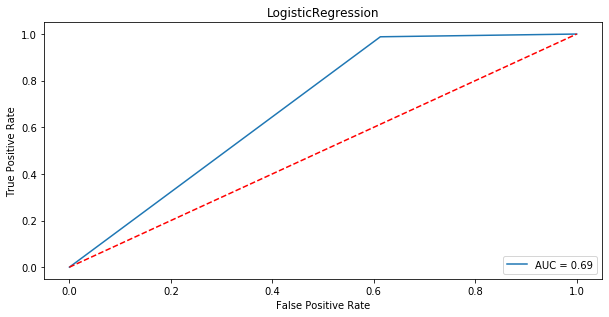

---------------------------- GaussianNB ------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy_score:  0.8275862068965517


cross_val_score:  0.812863568215892


roc_auc_score:  0.6876660341555978


Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.82      0.99      0.89        85

    accuracy                           0.83       116
   macro avg       0.87      0.69      0.72       116
weighted avg       0.84      0.83      0.80       116

Confusion matrix: 

[[12 19]
 [ 1 84]]


AUC_ROC Curve:



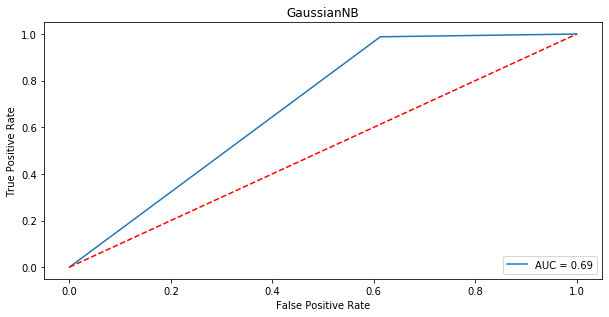

---------------------------- SupportVectorClassifier ------------------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


accuracy_score:  0.8362068965517241


cross_val_score:  0.8180809595202397


roc_auc_score:  0.7037950664136623


Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.42      0.58        31
           1       0.82      0.99      0.90        85

    accuracy                           0.84       116
   macro avg       0.88      0.70      0.74       116
weighted avg       0.85      0.84      0.81       116

Confusion matrix: 

[[13 18]
 [ 1 84]]


AUC_ROC Curve:



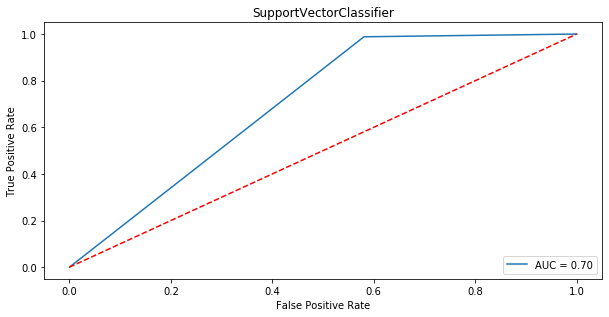

---------------------------- DecisionTreeClassifier ------------------------------


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


accuracy_score:  0.7155172413793104


cross_val_score:  0.7331484257871065


roc_auc_score:  0.6419354838709678


Classification report: 

              precision    recall  f1-score   support

           0       0.47      0.48      0.48        31
           1       0.81      0.80      0.80        85

    accuracy                           0.72       116
   macro avg       0.64      0.64      0.64       116
weighted avg       0.72      0.72      0.72       116

Confusion matrix: 



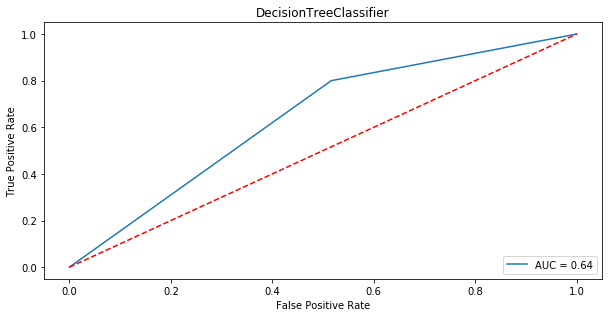

---------------------------- KNeighborsClassifier ------------------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy_score:  0.8275862068965517


cross_val_score:  0.7920839580209895


roc_auc_score:  0.7081593927893739


Classification report: 

              precision    recall  f1-score   support

           0       0.82      0.45      0.58        31
           1       0.83      0.96      0.89        85

    accuracy                           0.83       116
   macro avg       0.83      0.71      0.74       116
weighted avg       0.83      0.83      0.81       116

Confusion matrix: 

[[14 17]
 [ 3 82]]


AUC_ROC Curve:



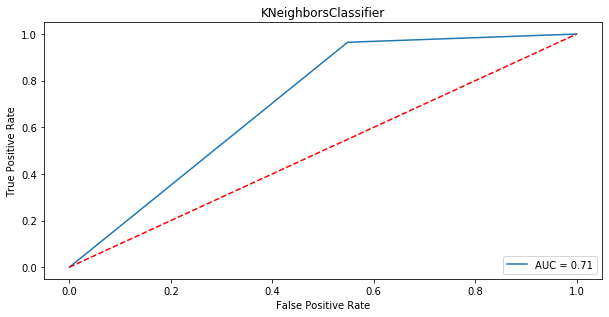

In [79]:
Model = []
Score = []
CV_Score = []
ROC_Score = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, pre)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score: ', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
   
    print('Classification report: \n')
    print(classification_report(y_test, pre))
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test, pre)
    print(cm)
    print('\n')
    
    plt.figure(figsize=(10, 50))
    plt.subplot(912)
    print('AUC_ROC Curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    

In [80]:
# Result store in DataFrame
Result = pd.DataFrame({'Model':Model, 'Accuracy Score':Score, 'CV Score':CV_Score, 'ROC AUC Score':ROC_Score})
Result

,Model,Accuracy Score,CV Score,ROC AUC Score
0,LogisticRegression,82.758621,81.634183,68.766603
1,GaussianNB,82.758621,81.286357,68.766603
2,SupportVectorClassifier,83.620690,81.808096,70.379507
3,DecisionTreeClassifier,71.551724,73.314843,64.193548
4,KNeighborsClassifier,82.758621,79.208396,70.815939


From the above algorithms, we can say that the SupportVectorClassifier is working well by giving an accuracy of 83.62% and cross validation score of 81.80%

## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)
print('Test accuracy:{}%'.format(round(RFC.score(x_test, y_test)*100, 2)))

Test accuracy:81.03%


In [83]:
pred_RFC = RFC.predict(x_test)

In [84]:
print(confusion_matrix(y_test, pred_RFC))

[[13 18]
 [ 4 81]]


In [85]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.76      0.42      0.54        31
           1       0.82      0.95      0.88        85

    accuracy                           0.81       116
   macro avg       0.79      0.69      0.71       116
weighted avg       0.80      0.81      0.79       116



## Cross validation for Random Forest Classifier

In [86]:
RFC_cv = cross_val_score(RandomForestClassifier(), x, y, cv=5)
print(RFC_cv)
print(RFC_cv.mean()*100, RFC_cv.std())

[0.79310345 0.77586207 0.7826087  0.83478261 0.8       ]
79.7271364317841 0.0205195624294134


## Hyperparameter Tuning for SVC

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.685, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.685, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.731, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.685, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.685, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.685, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.685, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [88]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [89]:
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.82      0.99      0.89        85

    accuracy                           0.83       116
   macro avg       0.87      0.69      0.72       116
weighted avg       0.84      0.83      0.80       116



## Saving the model

In [90]:
import joblib
joblib.dump(svc, 'loan_prediction.pkl')

['loan_prediction.pkl']